**Import packages**

In [1]:
!pip install pytictoc

In [2]:
!pip install tensorflow

In [3]:
import random
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
from pytictoc import TicToc
warnings.filterwarnings( "ignore" )

**Load the dataset**

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

**Normalize the input data**

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Set directory to saved models**

In [6]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/ECE 696B/Project - ECE696B
# # %cd /content/gdrive/MyDrive/Colab Notebooks

In [7]:
%cd C:\Users\nh202\My Drive (nh202@arizona.edu)\ECE 696B\Project - ECE696B

C:\Users\nh202\My Drive (nh202@arizona.edu)\ECE 696B\Project - ECE696B


In [8]:
from keras.models import load_model
MLP_CIFAR10_base = load_model('MLP_CIFAR10.h5')
MLP_CIFAR10_GNA_trained = load_model('MLP_CIFAR10_GNA_trained.h5')
MLP_CIFAR10_FGSM_trained = load_model('MLP_CIFAR10_FGSM_trained.h5')
# MLP_CIFAR10_CW_trained = load_model('MLP_CIFAR10_CW_trained.h5')

# Evaluate performance of MLP models

**Performance on GNA adversarial examples**

In [9]:
%cd C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\GNA

C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\GNA


In [10]:
indexes = range(1000)
sigmas = np.arange(0,1.1,0.1)
stored_results = []
for i in sigmas:
  print(f'Sigma value: {np.round(i,1)}')
  stored_results.append(i)
    
  filename = 'CIFAR10_X_test_noisy_GNA_sigma' + str(np.round(i,1)) + '.npy'
  X_test_noisy = np.load(filename)
  
  avg_l2_norm = np.mean(np.sqrt(np.sum((X_test_noisy-X_test[indexes])**2, axis=(1,2))))
  stored_results.append(avg_l2_norm)
  print("Average l2 distance of the perturbation:", avg_l2_norm)

  print('\nTest accuracy on perturbed data')
  _,accuracy = MLP_CIFAR10_base.evaluate(X_test_noisy,y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = MLP_CIFAR10_GNA_trained.evaluate(X_test_noisy,y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = MLP_CIFAR10_FGSM_trained.evaluate(X_test_noisy,y_test[indexes])
  stored_results.append(accuracy)

#   _,accuracy = MLP_CIFAR10_CW_trained.evaluate(X_test_noisy,y_test[indexes])
#   stored_results.append(accuracy)

  print('\n')

Sigma value: 0.0
Average l2 distance of the perturbation: 0.0

Test accuracy on perturbed data
32/32 [==============================] - 1s 13ms/step - loss: 1.5407 - accuracy: 0.4430


Sigma value: 0.1
Average l2 distance of the perturbation: 3.0837902228127985

Test accuracy on perturbed data
32/32 [==============================] - 1s 15ms/step - loss: 1.5674 - accuracy: 0.4120


Sigma value: 0.2
Average l2 distance of the perturbation: 5.828913201938512

Test accuracy on perturbed data
32/32 [==============================] - 1s 19ms/step - loss: 1.6801 - accuracy: 0.3950


Sigma value: 0.3
Average l2 distance of the perturbation: 8.100654975115406

Test accuracy on perturbed data
32/32 [==============================] - 0s 13ms/step - loss: 1.8057 - accuracy: 0.3450


Sigma value: 0.4
Average l2 distance of the perturbation: 9.856309148560845

Test accuracy on perturbed data
32/32 [==============================] - 1s 14ms/step - loss: 1.9503 - accuracy: 0.3160


Sigma value: 0.5
A

In [11]:
stored_results = np.array(stored_results)
stored_results = stored_results.reshape(-1,5)
# stored_results = stored_results.reshape(-1,6)
df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','MLP_CIFAR10_base',\
                                 'MLP_CIFAR10_GNA_trained','MLP_CIFAR10_FGSM_trained'])
# df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','MLP_CIFAR10_base',\
#                                  'MLP_CIFAR10_GNA_trained','MLP_CIFAR10_FGSM_trained','MLP_CIFAR10_CW_trained'])
df.to_csv('Performance of adversarially trained MLP models on GNA [CIFAR10].csv', index=False)
df

,sigma,avg_l2_norm,MLP_CIFAR10_base,MLP_CIFAR10_GNA_trained,MLP_CIFAR10_FGSM_trained
0,0.0,0.000000,0.493,0.475,0.443
1,0.1,3.083790,0.491,0.489,0.412
2,0.2,5.828913,0.465,0.438,0.395
3,0.3,8.100655,0.434,0.406,0.345
4,0.4,9.856309,0.421,0.361,0.316
5,0.5,11.189331,0.379,0.306,0.280
6,0.6,12.185753,0.342,0.296,0.225
7,0.7,12.947098,0.295,0.234,0.212
8,0.8,13.542925,0.275,0.247,0.188
9,0.9,14.018838,0.254,0.212,0.187


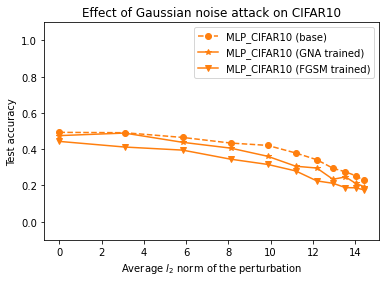

In [12]:
df = pd.read_csv('Performance of adversarially trained MLP models on GNA [CIFAR10].csv')
plt.plot(df['avg_l2_norm'],df['MLP_CIFAR10_base'],'o--', color = 'C1')
plt.plot(df['avg_l2_norm'],df['MLP_CIFAR10_GNA_trained'],'*-', color = 'C1')
plt.plot(df['avg_l2_norm'],df['MLP_CIFAR10_FGSM_trained'],'v-', color = 'C1')
# plt.plot(df['avg_l2_norm'],df['MLP_CIFAR10_CW_trained'],'d-', color = 'C1')


plt.xlabel('Average $l_2$ norm of the perturbation')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
plt.legend(['MLP_CIFAR10 (base)', 'MLP_CIFAR10 (GNA trained)',\
            'MLP_CIFAR10 (FGSM trained)'])
# plt.legend(['MLP_CIFAR10 (base)', 'MLP_CIFAR10 (GNA trained)',\
#             'MLP_CIFAR10 (FGSM trained)', 'MLP_CIFAR10 (CW trained)'])
plt.title('Effect of Gaussian noise attack on CIFAR10')
plt.savefig('Adversarially trained MLP models GNA on CIFAR10 [l2 norm]', dpi=600)
plt.show()

**Performance on FGSM adversarial examples**

In [13]:
%cd C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\FGSM

C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\FGSM


In [14]:
indexes = range(1000)
stored_results = []
for eps in np.arange(0.1,1.1,0.1):
    
  print(f'eps value: {np.round(eps,1)}')
  stored_results.append(eps)

  np_array_filename = 'CIFAR10_FGSM_'+ str(len(indexes)) +'_adv_examples_eps_'+ str(round(eps,1)) + '.npz'
  data = np.load(np_array_filename)

  # access the arrays using their keys
  X_test_FGSM_MLP = data['X_test_FGSM_MLP']

  avg_l2_norm_MLP = np.mean(np.sqrt(np.sum((X_test_FGSM_MLP-X_test[:len(indexes)])**2, axis=(1,2))))
  stored_results.append(avg_l2_norm_MLP)
    
  _,accuracy = MLP_CIFAR10_base.evaluate(X_test_FGSM_MLP[indexes],y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = MLP_CIFAR10_GNA_trained.evaluate(X_test_FGSM_MLP[indexes],y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = MLP_CIFAR10_FGSM_trained.evaluate(X_test_FGSM_MLP[indexes],y_test[indexes])
  stored_results.append(accuracy)

#   _,accuracy = MLP_CIFAR10_CW_trained.evaluate(X_test_FGSM_MLP[indexes],y_test[indexes])
#   stored_results.append(accuracy)
    

eps value: 0.1
32/32 [==============================] - 0s 14ms/step - loss: 0.5734 - accuracy: 0.8390
eps value: 0.2
32/32 [==============================] - 0s 14ms/step - loss: 0.3474 - accuracy: 0.8860
eps value: 0.3
32/32 [==============================] - 0s 14ms/step - loss: 0.2985 - accuracy: 0.8980
eps value: 0.4
32/32 [==============================] - 0s 13ms/step - loss: 0.3001 - accuracy: 0.8970
eps value: 0.5
32/32 [==============================] - 0s 13ms/step - loss: 0.3161 - accuracy: 0.8970
eps value: 0.6
32/32 [==============================] - 1s 16ms/step - loss: 0.3470 - accuracy: 0.8860
eps value: 0.7
32/32 [==============================] - 0s 13ms/step - loss: 0.3857 - accuracy: 0.8830
eps value: 0.8
32/32 [==============================] - 1s 15ms/step - loss: 0.4167 - accuracy: 0.8780
eps value: 0.9
32/32 [==============================] - 1s 15ms/step - loss: 0.4328 - accuracy: 0.8730
eps value: 1.0
32/32 [==============================] - 1s 16ms/step - lo

In [15]:
stored_results = np.array(stored_results)
stored_results = stored_results.reshape(-1,5)
# stored_results = stored_results.reshape(-1,6)
df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','MLP_CIFAR10_base',\
                                 'MLP_CIFAR10_GNA_trained','MLP_CIFAR10_FGSM_trained'])
# df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','MLP_CIFAR10_base',\
#                                  'MLP_CIFAR10_GNA_trained','MLP_CIFAR10_FGSM_trained','MLP_CIFAR10_CW_trained'])
df.to_csv('Performance of adversarially trained MLP models on FGSM [CIFAR10].csv', index=False)
df

,sigma,avg_l2_norm,MLP_CIFAR10_base,MLP_CIFAR10_GNA_trained,MLP_CIFAR10_FGSM_trained
0,0.1,3.134206,0.003,0.001,0.839
1,0.2,6.115572,0.002,0.012,0.886
2,0.3,8.867736,0.007,0.024,0.898
3,0.4,11.324848,0.016,0.033,0.897
4,0.5,13.434837,0.015,0.034,0.897
5,0.6,15.156845,0.019,0.036,0.886
6,0.7,16.451214,0.021,0.038,0.883
7,0.8,17.313297,0.021,0.039,0.878
8,0.9,17.781821,0.023,0.039,0.873
9,1.0,17.941675,0.023,0.039,0.870


Test accuracy on unperturbed data
32/32 [==============================] - 1s 16ms/step - loss: 1.5407 - accuracy: 0.4430


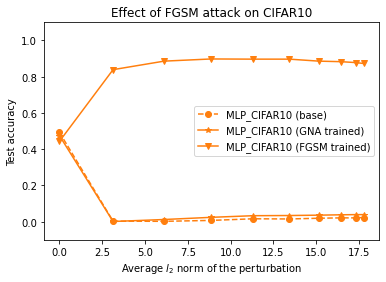

In [16]:
df = pd.read_csv('Performance of adversarially trained MLP models on FGSM [CIFAR10].csv')

df = df.shift(1)
print('Test accuracy on unperturbed data')
_, accuracy_base = MLP_CIFAR10_base.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_GNA_trained = MLP_CIFAR10_GNA_trained.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_FGSM_trained = MLP_CIFAR10_FGSM_trained.evaluate(X_test[indexes],y_test[indexes]);
# _, accuracy_CW_trained = MLP_CIFAR10_CW_trained.evaluate(X_test[indexes],y_test[indexes]);

df.iloc[0] = [0, 0, accuracy_base, accuracy_GNA_trained, accuracy_FGSM_trained]
# df.iloc[0] = [0, 0, accuracy_base, accuracy_GNA_trained, accuracy_FGSM_trained, accuracy_CW_trained]

plt.plot(df['avg_l2_norm'],df['MLP_CIFAR10_base'],'o--', color = 'C1')
plt.plot(df['avg_l2_norm'],df['MLP_CIFAR10_GNA_trained'],'*-', color = 'C1')
plt.plot(df['avg_l2_norm'],df['MLP_CIFAR10_FGSM_trained'],'v-', color = 'C1')
# plt.plot(df['avg_l2_norm'],df['MLP_CIFAR10_CW_trained'],'d-', color = 'C1')


plt.xlabel('Average $l_2$ norm of the perturbation')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
plt.legend(['MLP_CIFAR10 (base)', 'MLP_CIFAR10 (GNA trained)',\
            'MLP_CIFAR10 (FGSM trained)'])
# plt.legend(['MLP_CIFAR10 (base)', 'MLP_CIFAR10 (GNA trained)',\
#             'MLP_CIFAR10 (FGSM trained)', 'MLP_CIFAR10 (CW trained)'])
plt.title('Effect of FGSM attack on CIFAR10')
plt.savefig('Adversarially trained MLP models FGSM on CIFAR10 [l2 norm]', dpi=600)
plt.show()

**Performance on CW adversarial examples**

In [17]:
%cd C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\CW

C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\CW


In [18]:
indexes = range(1000)
stored_results = []
lot = 0
for c in np.arange(0.1,1.1,0.1):
    filename = 'CIFAR10_x_adv_stack_MLP_Lot' + str(lot+1) + '_c' + str(np.round(c,1)) + '.npy'
    x_adv_stack = np.load(filename)
    
    stored_results.append(np.round(c,1))
    
    avg_l2_norm = np.mean(np.sqrt(np.sum((x_adv_stack-X_test[:len(x_adv_stack)])**2, axis=(1,2))))    
    
    if np.isnan(avg_l2_norm):
        delta = x_adv_stack-X_test[:len(x_adv_stack)]
        indices = np.argwhere(np.isnan(delta))
        delta[indices] = 1
        x_adv_stack = X_test[:len(x_adv_stack)] + delta
        x_adv_stack = np.clip(x_adv_stack, 0, 1)
        delta = x_adv_stack-X_test[:len(x_adv_stack)]
        avg_l2_norm = np.mean(np.sqrt(np.sum((x_adv_stack-X_test[:len(x_adv_stack)])**2, axis=(1,2))))
        
    stored_results.append(avg_l2_norm)
    
    _,accuracy = MLP_CIFAR10_base.evaluate(x_adv_stack,y_test[indexes])
    stored_results.append(accuracy)

    _,accuracy = MLP_CIFAR10_GNA_trained.evaluate(x_adv_stack,y_test[indexes])
    stored_results.append(accuracy)

    _,accuracy = MLP_CIFAR10_FGSM_trained.evaluate(x_adv_stack,y_test[indexes])
    stored_results.append(accuracy)

#     _,accuracy = MLP_CIFAR10_CW_trained.evaluate(x_adv_stack,y_test[indexes])
#     stored_results.append(accuracy)

32/32 [==============================] - 1s 17ms/step - loss: 1.5349 - accuracy: 0.4470


In [19]:
stored_results = np.array(stored_results)
stored_results = stored_results.reshape(-1,5)
# stored_results = stored_results.reshape(-1,6)
df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','MLP_CIFAR10_base',\
                                 'MLP_CIFAR10_GNA_trained','MLP_CIFAR10_FGSM_trained'])
# df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','MLP_CIFAR10_base',\
#                                  'MLP_CIFAR10_GNA_trained','MLP_CIFAR10_FGSM_trained','MLP_CIFAR10_CW_trained'])
df.to_csv('Performance of adversarially trained MLP models on CW [CIFAR10].csv', index=False)
df

,sigma,avg_l2_norm,MLP_CIFAR10_base,MLP_CIFAR10_GNA_trained,MLP_CIFAR10_FGSM_trained
0,0.1,0.273041,0.203,0.413,0.448
1,0.2,0.281331,0.207,0.409,0.448
2,0.3,0.286861,0.204,0.403,0.448
3,0.4,0.291121,0.204,0.400,0.449
4,0.5,0.295225,0.204,0.399,0.447
5,0.6,0.299093,0.204,0.400,0.448
6,0.7,0.304811,0.204,0.395,0.446
7,0.8,0.309062,0.204,0.399,0.449
8,0.9,0.315039,0.204,0.396,0.447
9,1.0,0.317802,0.204,0.398,0.447


Test accuracy on unperturbed data
32/32 [==============================] - 0s 14ms/step - loss: 1.5407 - accuracy: 0.4430


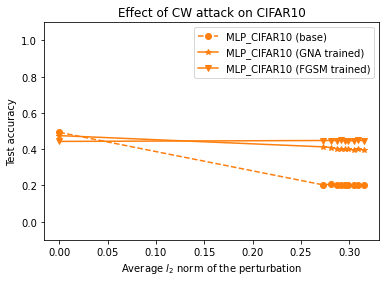

In [20]:
df = pd.read_csv('Performance of adversarially trained MLP models on CW [CIFAR10].csv')

df = df.shift(1)
print('Test accuracy on unperturbed data')
_, accuracy_base = MLP_CIFAR10_base.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_GNA_trained = MLP_CIFAR10_GNA_trained.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_FGSM_trained = MLP_CIFAR10_FGSM_trained.evaluate(X_test[indexes],y_test[indexes]);
# _, accuracy_CW_trained = MLP_CIFAR10_CW_trained.evaluate(X_test[indexes],y_test[indexes]);
df.iloc[0] = [0, 0, accuracy_base, accuracy_GNA_trained, accuracy_FGSM_trained]
# df.iloc[0] = [0, 0, accuracy_base, accuracy_GNA_trained, accuracy_FGSM_trained, accuracy_CW_trained]

df = df.sort_values('avg_l2_norm', ascending=True)

plt.plot(df['avg_l2_norm'],df['MLP_CIFAR10_base'],'o--', color = 'C1')
plt.plot(df['avg_l2_norm'],df['MLP_CIFAR10_GNA_trained'],'*-', color = 'C1')
plt.plot(df['avg_l2_norm'],df['MLP_CIFAR10_FGSM_trained'],'v-', color = 'C1')
# plt.plot(df['avg_l2_norm'],df['MLP_CIFAR10_CW_trained'],'d-', color = 'C1')


plt.xlabel('Average $l_2$ norm of the perturbation')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
plt.legend(['MLP_CIFAR10 (base)', 'MLP_CIFAR10 (GNA trained)',\
            'MLP_CIFAR10 (FGSM trained)'])
# plt.legend(['MLP_CIFAR10 (base)', 'MLP_CIFAR10 (GNA trained)',\
#             'MLP_CIFAR10 (FGSM trained)', 'MLP_CIFAR10 (CW trained)'])
plt.title('Effect of CW attack on CIFAR10')
plt.savefig('Adversarially trained MLP models CW on CIFAR10 [l2 norm]', dpi=600)
plt.show()